In [ ]:
#Question 1

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('GOLD.csv',delimiter=',')                    #load gold.csv
def f(s):
    return(s[:-1])                                            #remove the perc sign from change
data['Change %']=data['Change %'].apply(f)
#del data['Change %']
data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14,NaN,48.365693


In [2]:
data1=data.copy()
req=data1[data1['Pred'].notna()]                   #to take the non NaN values

In [3]:
req

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
406,"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57,-31.0,301.615081
407,"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12,72.0,241.475101
408,"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26,35.0,188.222186
409,"Dec 07, 2018",31440,31011,31480,30941,11.24K,1.40,669.0,976.692705


In [4]:
from sklearn.linear_model import LinearRegression                  #import LinearRegression
#     PRED
x_train=req.iloc[:,1:5]                                            #taking OHLC 
#x_train['Change']=req.iloc[:,6]
y_train=req.iloc[:,7]                                              #take Pred column as linear dependency
arg=LinearRegression()                                             #make obj of linear regression

print('After taking Pred column as our linear dependent on OHLC our score is :')
arg.fit(x_train,y_train)                                           #fits the model

arg.fit(x_train,y_train)
print(arg.score(x_train,y_train))                                  #the score obtained 

coef=arg.coef_                                                      
print('The corresponding m values are :')
print(list(coef))
inter=arg.intercept_
print('The corresponding c value is :')
print(inter)

After taking Pred column as our linear dependent on OHLC our score is :
1.0
The corresponding m values are :
[2.0000000000000004, 3.0000000000000018, -1.0000000000000013, -4.000000000000002]
The corresponding c value is :
1.91562321560923e-11


In [5]:
x_train

,Price,Open,High,Low
0,28060,28400,28482,28025
1,28184,28136,28382,28135
2,28119,28145,28255,28097
3,27981,28125,28192,27947
4,28007,28060,28146,27981
...,...,...,...,...
406,30964,30874,31085,30874
407,30926,30830,30970,30825
408,31005,31039,31196,30974
409,31440,31011,31480,30941


In [6]:
data2=data.copy()
req=data2[data2['Pred'].notna()]                          #non NaN values

In [7]:

#          NEW             
x_train=req.iloc[:,1:5]                                    #taking OHLC 
y_train=req.iloc[:,8]                                     #taking New col as linear dependency
arg1=LinearRegression()                                   #model of linear regression

print('After taking new column as our linear dependent on OHLC our score is :')
arg1.fit(x_train,y_train)

print(arg1.score(x_train,y_train))
coef=arg1.coef_
print('The corresponding m values are :')
print(list(coef))
inter=arg1.intercept_
print('The corresponding c value is :')
print(inter)


After taking new column as our linear dependent on OHLC our score is :
0.9999941203360704
The corresponding m values are :
[1.0120264052588197, -1.0009425231696658, 1.0049222091511247, -1.016043047618508]
The corresponding c value is :
-0.21616304406515496


In [8]:
print('As taking Pred as our column of linear dependent our score is more than taking new as our column of linear dependent ,','so further i take Pred column as our linear dependent')

As taking Pred as our column of linear dependent our score is more than taking new as our column of linear dependent , so further i take Pred column as our linear dependent


In [9]:
test=data1[data1['Pred'].isna()]                                    #the data having pred col as NaN values
x_test=test.iloc[:,1:5]                                             #the OHLC values
#on taking Pred as our linear dependency
y_pred1=arg.predict(x_test)                                         #predict using Pred as linear dependency
arg.score(x_test,y_pred1)
test.iloc[:,7]=y_pred1
data1.iloc[411:512,7]=y_pred1


E:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
test=data2[data2['Pred'].isna()]                                   #the data having New as NaN values
x_test=test.iloc[:,1:5]                                            #the OHLC values
#on taking Pred as our linear dependency
y_pred2=arg1.predict(x_test)
arg1.score(x_test,y_pred2)                                         #predict using New as Linear dependency
test.iloc[:,7]=y_pred2
data2.iloc[411:512,7]=y_pred2

E:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


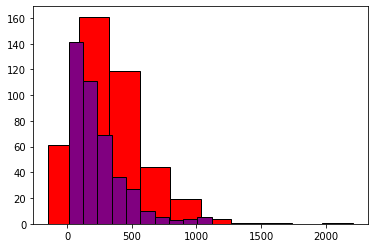

In [11]:
import matplotlib.pyplot as plt
x_test=data1.iloc[:411,1:5]                                                #plot the hist on both trained regressions
y=arg.predict(x_test)
plt.hist(y,edgecolor='black',color='red')
x_test=data2.iloc[:411,1:5]
y=arg1.predict(x_test)
plt.hist(y,edgecolor='black',color='purple')
#plt.hist(data.iloc[:411,7],edgecolor='black')
plt.show()

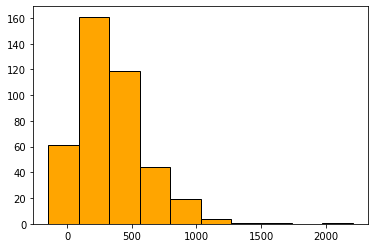

In [12]:
plt.hist(data.iloc[:411,7],edgecolor='black',color='orange')                    #plot the hist on actual data
plt.show()

In [13]:
print('As according to graph we can see that purple one is less distant to actual so conclusion is : Pred column is linearly dependent on OHLC and New column is polyomial dependent')

As according to graph we can see that purple one is less distant to actual so conclusion is : Pred column is linearly dependent on OHLC and New column is polyomial dependent


In [ ]:
#Question 2

In [79]:
import pandas as pd
stock=pd.read_csv('RAYMOND.csv',index_col='Date')
ind=pd.read_csv('Nifty50.csv',index_col='Date')
daily_prices=pd.concat([stock['Close Price'][448:],ind['Close'][448:]],axis=1)
daily_prices.head()

,Close Price,Close
Date,,
01-Mar-2019,786.20,10863.50
05-Mar-2019,790.90,10987.45
06-Mar-2019,817.45,11053.00
07-Mar-2019,815.15,11058.20
08-Mar-2019,808.15,11035.40


In [80]:
daily_prices=daily_prices.pct_change(1)
clean_daily_prices=daily_prices.dropna(axis=0)

In [81]:
X=clean_daily_prices['Close']
y=clean_daily_prices['Close Price']

In [82]:
import statsmodels.api as sm

In [83]:
X1=sm.add_constant(X)

In [84]:
model=sm.OLS(y,X1)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.790
Date:                Mon, 01 Jun 2020   Prob (F-statistic):             0.0581
Time:                        11:13:15   Log-Likelihood:                 121.01
No. Observations:                  45   AIC:                            -238.0
Df Residuals:                      43   BIC:                            -234.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.003     -0.183      0.856      -0.006       0.005
Close          0.6866      0.353      1.947      0.058      -0.025       1.398
==============================================================================
Omnibus:                       23.759   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.005
Skew:                           1.335   Prob(JB):                     1.14e-12
Kurtosis:                       7.713   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
print('Using OLS Model The daily return beta of the last three months is equal to ',0.6866)

Using OLS Model The daily return beta of the last three months is equal to  0.6866


In [86]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print('The daily return beta value calculated using regression is equal to :',end=" ")
print(slope)

The daily return beta value calculated using regression is equal to : 0.6866322290975121


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
15-May-2017,RAYMOND,EQ,763.45,765.00,779.00,757.05,773.90,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
16-May-2017,RAYMOND,EQ,772.80,773.45,801.45,768.10,783.50,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
17-May-2017,RAYMOND,EQ,785.00,786.00,804.95,778.40,785.50,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
18-May-2017,RAYMOND,EQ,783.65,779.35,779.95,740.20,744.00,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
19-May-2017,RAYMOND,EQ,746.95,748.00,767.50,714.00,722.00,723.10,740.30,561346,4.155619e+08,13328,137648,24.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07-May-2019,RAYMOND,EQ,806.05,806.05,821.60,799.25,811.15,808.95,814.61,2038484,1.660574e+09,33444,321610,15.78
08-May-2019,RAYMOND,EQ,808.95,807.90,816.90,797.05,806.40,807.10,807.55,930010,7.510262e+08,19028,51327,5.52
09-May-2019,RAYMOND,EQ,807.10,801.00,811.10,798.00,805.25,805.30,804.23,425205,3.419611e+08,8608,34675,8.15


In [95]:
def f(s):
    li=[ele.strip() for ele in str(s).split('-')]
    return li[1]
stock['Date']=stock.index
stock['Month']=stock['Date'].apply(f)
req_stock=pd.DataFrame(stock.groupby(['Month'])['Close Price'].mean())
req_stock

,Close Price
Month,
Apr,917.846250
Aug,778.234524
Dec,909.117500
Feb,828.374359
Jan,944.738889
Jul,830.515116
Jun,844.121429
Mar,863.134211
May,906.625581


In [106]:
ind['Date']=ind.index
ind['Month']=ind['Date'].apply(f)
req_index=pd.DataFrame(ind.groupby(['Month'])['Close'].mean())
monthly_prices=pd.concat([req_stock['Close Price'],req_index['Close']],axis=1)
monthly_prices

,Close Price,Close
Month,,
Apr,917.846250,11039.855000
Aug,778.234524,10699.811905
Dec,909.117500,10550.352500
Feb,828.374359,10687.328205
Jan,944.738889,10790.734444
Jul,830.515116,10433.905814
Jun,844.121429,10174.964286
Mar,863.134211,10774.930263
May,906.625581,10458.618605


In [107]:
monthly_prices=monthly_prices.pct_change(1)
clean_monthly_prices=monthly_prices.dropna(axis=0)

In [108]:
X=clean_monthly_prices['Close']
y=clean_monthly_prices['Close Price']

In [109]:
import statsmodels.api as sm

In [111]:
X1=sm.add_constant(X)
model=sm.OLS(y,X1)
result=model.fit()
result.summary()

E:\anaconda\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close Price   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.073
Date:                Mon, 01 Jun 2020   Prob (F-statistic):              0.327
Time:                        11:28:37   Log-Likelihood:                 9.8544
No. Observations:                  11   AIC:                            -15.71
Df Residuals:                       9   BIC:                            -14.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.033     -0.032      0.976      -0.076       0.074
Close          1.2136      1.172      1.036      0.327      -1.437       3.864
==============================================================================
Omnibus:                        1.330   Durbin-Watson:                   3.312
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                0.943
Skew:                           0.471   Prob(JB):                        0.624
Kurtosis:                       1.918   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
print(' Using OLS model The monthly return beta of the last three months is equal to ',1.2136)

 Using OLS model The monthly return beta of the last three months is equal to  1.2136


In [127]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print('The monthly return beta value calculated using regression is equal to :',end=" ")
print(slope)
print()
print('The daily beta value is less than 1 but the monthly beta value is greater than 1')
print()
print('A beta of less than 1 means it tends to be less volatile than the market.')
print()
print('Beta expresses the tradeoff between minimizing risk and maximizing return')
print()
print('A negative beta correlation means an investment moves in the opposite direction from the stock market. When the market rises, a negative-beta investment generally falls.')

The monthly return beta value calculated using regression is equal to : 1.2136208874085503

The daily beta value is less than 1 but the monthly beta value is greater than 1

A beta of less than 1 means it tends to be less volatile than the market.

Beta expresses the tradeoff between minimizing risk and maximizing return

A negative beta correlation means an investment moves in the opposite direction from the stock market. When the market rises, a negative-beta investment generally falls.


In [129]:
print('BRIEF SUMMARY ON BETA ')
print()
print("A beta greater than 1 indicates a stock's price swings more wildly than most stocks beta of 1 or lower indicates that a stock's price is steadier than most stocks.")
print()
print('If a stock had a beta of 0.68, we would expect it to be somewhat half as volatile as the market: A market return of 10% would mean a 6.8% gain for the company.')

BRIEF SUMMARY ON BETA 

A beta greater than 1 indicates a stock's price swings more wildly than most stocks beta of 1 or lower indicates that a stock's price is steadier than most stocks.

If a stock had a beta of 0.68, we would expect it to be somewhat half as volatile as the market: A market return of 10% would mean a 6.8% gain for the company.
